# Summarize GPS information

<div class="alert alert-block alert-success">
<b>Up to you:</b> To launch this notebook, you have to:<br/>
1. Go to tracklib/doc/source/notebook on a console,<br/>
2. Start the notebook server from the command line: jupyter notebook,<br/>
3. You should see the notebook open in your browser. Open "Switchbacks" by clicking on the link.<br/>
</div>

<p>This functionality of tracklib reduce the full dataset of GPS traces into a regular grid of summarized features. In each cell, <i>n</i> aggregated features (such as mean and standard deviation of speeds, number of traces, most frequent bearing ...) are computed to produce a set of raster maps, which may be seen as a single image with <i>n</i> channels. These process has been used in works presented in (1).</p>

<figure style='text-align:center'>
<img src="summarize3.png"  width="650" />
<figcaption><br/>Figure 1 : Workflow presented in (1) to produce raster images (5 meter-resolution grid)</figcaption>
</figure>

<div class="alert alert-block alert-info">
<b>Reference:</b><br/>(1) - Y. Méneroux and al. Convolutional Neural Network for Traffic Signal Inference based on GPS Traces. Proceedings of Spatial big data and machine learning in GIScience Workshop'18, August 28-31, 2018, Melbourne, Australia. GIScience.</div>



## Import de la librairie tracklib

In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import os.path
import sys

#-------------------------------------------------------
# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Chargement des traces

In [2]:
import os
import time

from tracklib.io.TrackReader import TrackReader as reader
from tracklib.core.GPSTime import GPSTime

PATH = '/home/marie-dominique/PROJET/FINI/MITAKA/DATA/mitaka/extrait/'
GPSTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
collection = reader.readFromFiles(pathdir=PATH, id_E=2, id_N=3, id_T=1)
print ('Number of tracks: ' + str(collection.size()))

Number of tracks: 600


## Nettoyage des traces

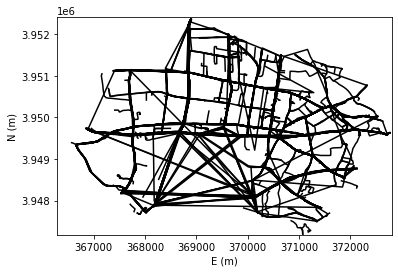

Number of tracks: 530


In [3]:
from tracklib.core.Track import Track
from tracklib.core.TrackCollection import TrackCollection

Xmin=366288.496639618
Xmax=372803.04499373
Ymin=3947174.20595923
Ymax=3952409.99610818

selections = TrackCollection()
for i in range(collection.size()):
    trace = collection.getTrack(i)
    
    t = Track()
    for j in range(trace.size()):
        o = trace.getObs(j)
        x = o.position.getX()
        y = o.position.getY()
        if x <= Xmax and x >= Xmin and y <= Ymax and y >= Ymin:
            t.addObs(o)
    
    if t.size() > 10:
        selections.addTrack(t)
        t.plot()

plt.xlim((Xmin, Xmax))
plt.ylim((Ymin, Ymax))
plt.show()

print ('Number of tracks: ' + str(selections.size()))
collection = selections

## Raster de la moyenne des vitesses

In [ ]:
from tracklib.algo import (Analytics, Summarising) 

# On crée l'AF speed
collection.addAnalyticalFeature(Analytics.speed)

af_algos = [Analytics.speed]
cell_operators = [Summarising.co_avg]
marge = 100
raster = Summarising.summarize(collection, af_algos, cell_operators, (3,3), marge)

raster.setColor((0, 0, 0), (255, 255, 255))
raster.plot(Analytics.speed, Summarising.co_avg, no_data_values = 0)